<a href="https://colab.research.google.com/github/SzymonNowakowski/diffusions/blob/master/weight_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight charts
### Author: Szymon Nowakowski



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Linear interpolating schedule

$$
  \alpha_t = 1-t \\
  \sigma_t = t
$$

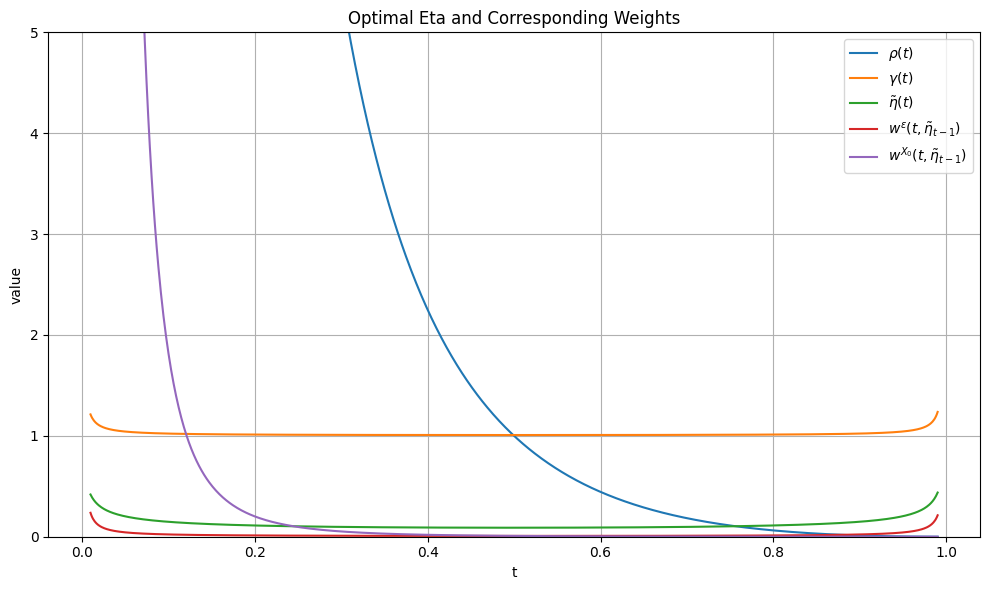

In [19]:
T = 1000
next_ind = lambda t: t+1/T
prev_ind = lambda t: t-1/T
alpha = lambda t: 1 - t
sigma = lambda t: t

rho = lambda t: (alpha(t)/sigma(t)) ** 2
gamma = lambda t: rho(t)/rho(next_ind(t))

optim_eta = lambda t: (1-1/gamma(t)) ** 0.5
optim_weight = lambda t: gamma(prev_ind(t)) - 1
weight_epsilon = lambda t, eta: rho(prev_ind(t))/eta**2 * (1/rho(prev_ind(t))**0.5 * (1-eta**2)**0.5- 1/rho(t)**0.5 )**2

weight_X0 = lambda t, eta: weight_epsilon(t, eta) * rho(t)

# Evaluation range
ts = np.linspace(0.01, 0.99, 1000)

# Compute values
gamma_vals = gamma(ts)
rho_vals = rho(ts)
eta_vals = optim_eta(ts)
#w_opt_vals = optim_weight(ts)
w_eps_eta_vals = weight_epsilon(ts, optim_eta(prev_ind(ts)))
w_X0_eta_vals = weight_X0(ts, optim_eta(prev_ind(ts)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts, rho_vals, label=r'$\rho(t)$')
plt.plot(ts, gamma_vals, label=r'$\gamma(t)$')
plt.plot(ts, eta_vals, label=r'$\tilde \eta (t)$')
#plt.plot(ts, w_opt_vals, label=r'$w_{\text{optim}}(t)$')
plt.plot(ts, w_eps_eta_vals, label=r'$w^\epsilon(t, \tilde \eta_{t-1})$')
plt.plot(ts, w_X0_eta_vals, label=r'$w^{X_0}(t, \tilde \eta_{t-1})$')
plt.xlabel('t')
plt.ylabel('value')
plt.title('Optimal Eta and Corresponding Weights')
plt.ylim(0, 5.0)  # restrict y-axis range
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Sine/Cosine Variance Preserving Interpolator

$$
\alpha(t) = \cos\left( \frac{\pi}{2} t \right)
$$

$$
\sigma(t) = \sin\left( \frac{\pi}{2} t \right)
$$

$$
\alpha^2(t) + \sigma^2(t) = 1
$$

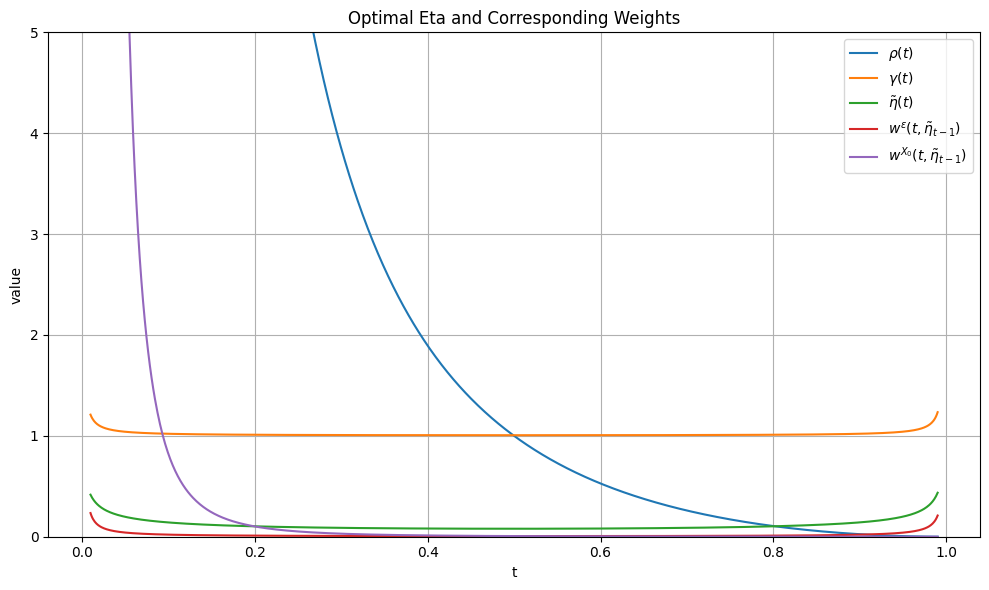

In [20]:
T = 1000
next_ind = lambda t: t+1/T
prev_ind = lambda t: t-1/T
alpha = lambda t: np.cos(t * np.pi / 2)
sigma = lambda t: np.sin(t * np.pi / 2)

rho = lambda t: (alpha(t)/sigma(t)) ** 2
gamma = lambda t: rho(t)/rho(next_ind(t))

optim_eta = lambda t: (1-1/gamma(t)) ** 0.5
optim_weight = lambda t: gamma(prev_ind(t)) - 1
weight_epsilon = lambda t, eta: rho(prev_ind(t))/eta**2 * (1/rho(prev_ind(t))**0.5 * (1-eta**2)**0.5- 1/rho(t)**0.5 )**2

weight_X0 = lambda t, eta: weight_epsilon(t, eta) * rho(t)

# Evaluation range
ts = np.linspace(0.01, 0.99, 1000)

# Compute values
gamma_vals = gamma(ts)
rho_vals = rho(ts)
eta_vals = optim_eta(ts)
#w_opt_vals = optim_weight(ts)
w_eps_eta_vals = weight_epsilon(ts, optim_eta(prev_ind(ts)))
w_X0_eta_vals = weight_X0(ts, optim_eta(prev_ind(ts)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts, rho_vals, label=r'$\rho(t)$')
plt.plot(ts, gamma_vals, label=r'$\gamma(t)$')
plt.plot(ts, eta_vals, label=r'$\tilde \eta (t)$')
#plt.plot(ts, w_opt_vals, label=r'$w_{\text{optim}}(t)$')
plt.plot(ts, w_eps_eta_vals, label=r'$w^\epsilon(t, \tilde \eta_{t-1})$')
plt.plot(ts, w_X0_eta_vals, label=r'$w^{X_0}(t, \tilde \eta_{t-1})$')
plt.xlabel('t')
plt.ylabel('value')
plt.title('Optimal Eta and Corresponding Weights')
plt.ylim(0, 5.0)  # restrict y-axis range
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()